In [1]:
# Imports
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = files.upload()
try:
  df = pd.read_csv(io.StringIO(data[[key for key in data][0]].decode("utf-8")))
  print("Data successfully uploaded.")
except Exception as error:
  print("DM Hairan or Lukas on Slack for help!")
  print(f'Error Message: {error}')

Saving ds_salaries.csv to ds_salaries.csv
Data successfully uploaded.


---
# Data Set Info

* **Dataset name**:  Data Science Salaries 2023

* **Link to dataset**: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

* **Brief dataset description**:  This dataset contains information on the salaries of data scientists across the globe. The data includes variables such as experience levels, gross salary, company location, and company size. 

Each time you work on your EDA, you may have to reload your dataset by running the previous code cell in "Choosing your data."

---
# Data Preparation


In [3]:
df.shape

(3755, 11)

In [4]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [8]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [9]:
df['salary_currency'].unique()

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [10]:
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [11]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [12]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

---
# Data Exploration


In [13]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [14]:
df.groupby('company_size').mean()

<ipython-input-14-2208e7c122cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('company_size').mean()


,work_year,salary,salary_in_usd,remote_ratio
company_size,,,,
L,2021.775330,438794.372247,118300.982379,60.572687
M,2022.501110,150712.836029,143130.548367,42.990802
S,2021.493243,281430.101351,78226.682432,72.297297


In [15]:
df.groupby('company_location').mean()

<ipython-input-15-5003cbaef9df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('company_location').mean()


,work_year,salary,salary_in_usd,remote_ratio
company_location,,,,
AE,2021.333333,100000.000000,100000.000000,66.666667
AL,2022.000000,10000.000000,10000.000000,50.000000
AM,2023.000000,50000.000000,50000.000000,0.000000
AR,2022.000000,25000.000000,25000.000000,100.000000
AS,2021.333333,468333.333333,29351.000000,66.666667
...,...,...,...,...
TH,2022.333333,618333.333333,23064.333333,66.666667
TR,2021.400000,114600.000000,19058.000000,40.000000
UA,2022.500000,57850.000000,57850.000000,37.500000


---
# Data Visualization

Univariate Analysis


Text(0.5, 1.0, 'Salaries of Data Science Professionals')

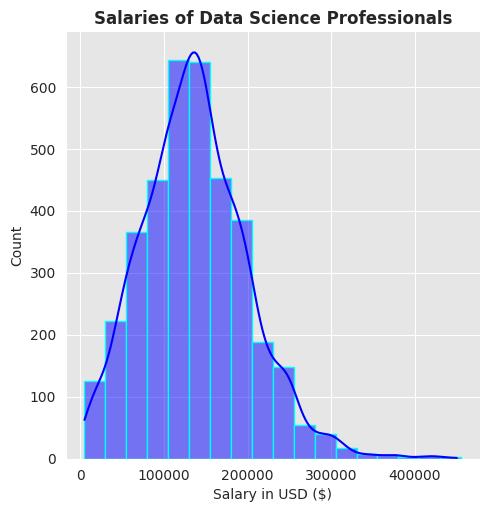

In [16]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.displot(df, x="salary_in_usd", color = 'blue', edgecolor = 'cyan', binwidth = 25000, kde = True)
plt.xlabel('Salary in USD ($)')
plt.title('Salaries of Data Science Professionals', fontweight = "bold")


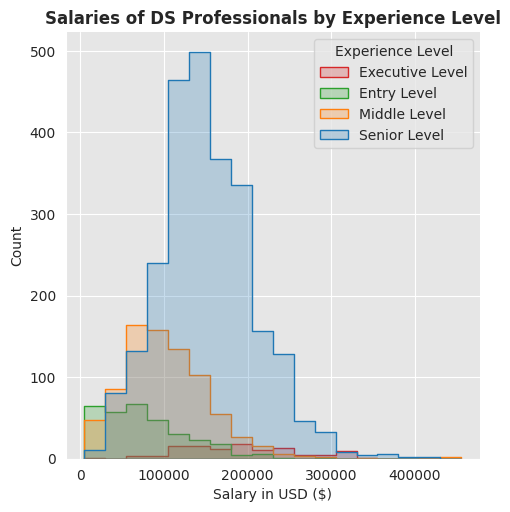

In [17]:
sns.displot(df, x="salary_in_usd", hue="experience_level", binwidth = 25000, element = "step", legend = False)
plt.xlabel('Salary in USD ($)')
plt.title('Salaries of DS Professionals by Experience Level', fontweight = "bold")
plt.legend(title='Experience Level', labels=['Executive Level', 'Entry Level', 'Middle Level', 'Senior Level'])


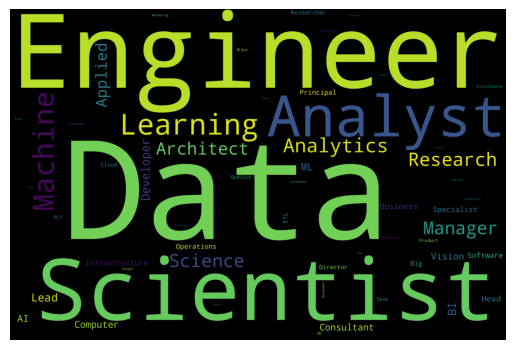

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [18]:
#!pip install wordcloud
from wordcloud import WordCloud

text = df['job_title'].values
text = ' '.join(text)


wordcloud = WordCloud(width = 3000, height = 2000, collocations=False, colormap= 'viridis', 
                      random_state=1, max_words=75, background_color="black").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize=[16,12])

Text(0.5, 1.0, 'Company Locations for Data Science Professionals')

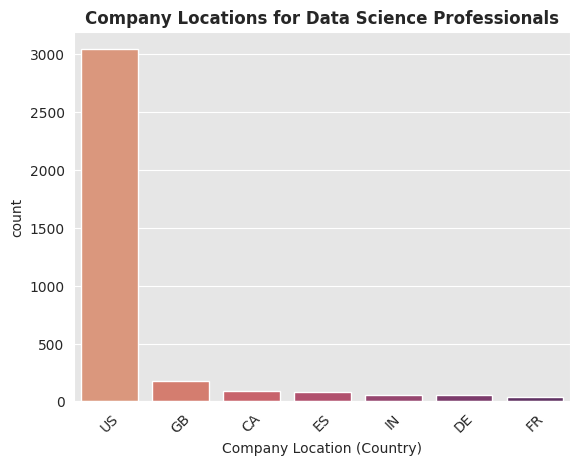

In [19]:
sns.countplot(x="company_location", data=df, palette="flare", order=df.company_location.value_counts().iloc[:7].index)
plt.xlabel('Company Location (Country)')
plt.xticks(rotation = 45)
plt.title('Company Locations for Data Science Professionals', fontweight = "bold")

Text(0.5, 1.0, 'Work Mode')

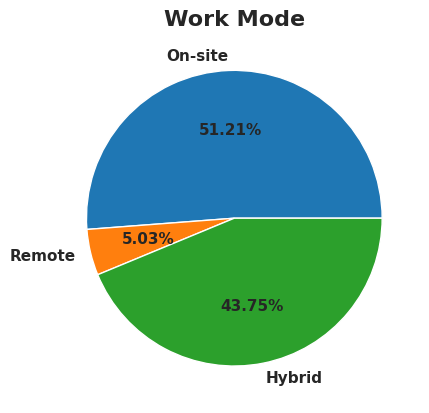

In [20]:
# I'm adding a Pie Chart because Hairan told me he likes pie charts more than bar charts at datafest :')
# 
#


values = df.groupby('remote_ratio').size()
labels = ['On-site', 'Remote', 'Hybrid']

plt.pie(values, labels=labels, autopct='%1.2f%%', textprops={'fontsize': 11, 'fontweight':"bold"})
plt.title("Work Mode", fontsize=16, fontweight="bold")

Bivariate Analysis



Text(0, 0.5, 'Job title')

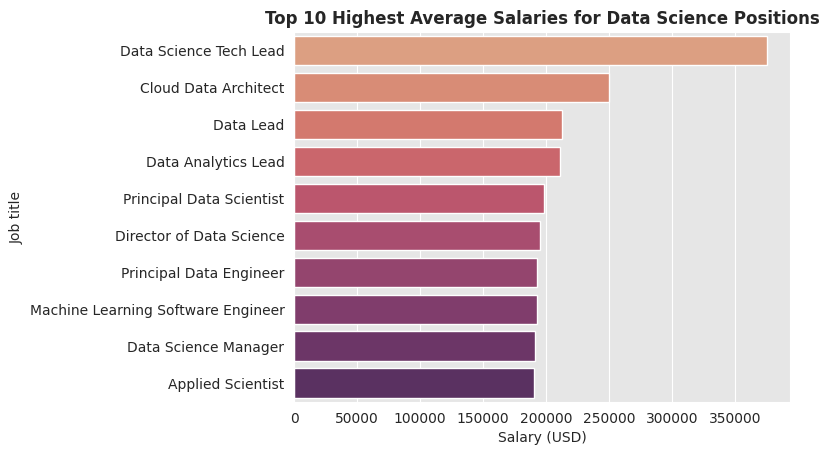

In [21]:
top_salary =  df.groupby('job_title').agg({'salary_in_usd':'mean'}).sort_values('salary_in_usd', ascending=False).head(10)
ax= sns.barplot(y = top_salary.index, x ='salary_in_usd', 
            data = top_salary,           
            palette = "flare")
            
plt.title('Top 10 Highest Average Salaries for Data Science Positions', fontweight="bold")
plt.xlabel('Salary (USD)', fontsize=10)
plt.ylabel('Job title', fontsize=10)


Text(0.5, 1.0, 'Salaries of DS Professionals by Company Size')

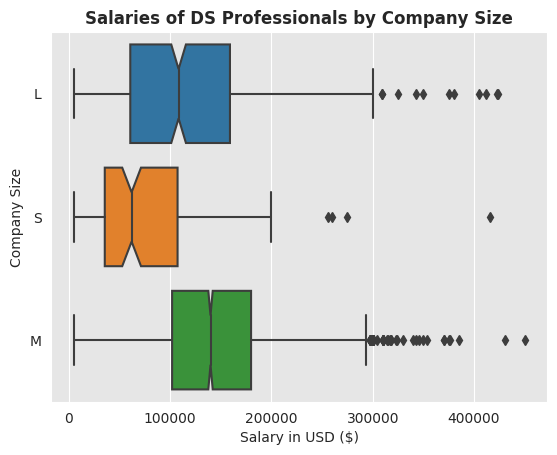

In [22]:
sns.boxplot(data=df, x="salary_in_usd", y="company_size", notch = True)
plt.xlabel('Salary in USD ($)')
plt.ylabel('Company Size')
plt.title('Salaries of DS Professionals by Company Size', fontweight = "bold")


In [23]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


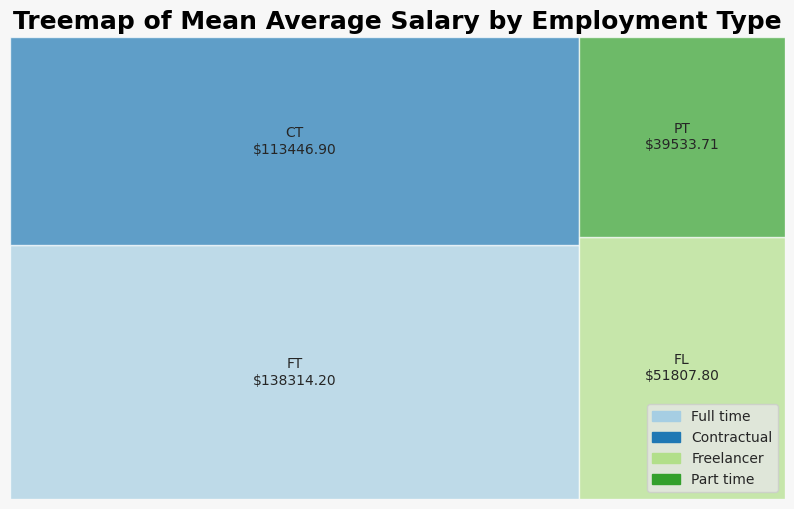

In [24]:
import folium
import squarify
import matplotlib.patches as mpatches


mean_salary = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
mean_salary = mean_salary.sort_values(by='salary_in_usd', ascending=False)
total_area = sum(mean_salary['salary_in_usd'])

mean_salary['normalized_salary'] = mean_salary['salary_in_usd'] / total_area

# Create treemap plot
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('#F7F7F7')
colors = plt.cm.Paired(range(len(mean_salary)))

squarify.plot(
    sizes=mean_salary['normalized_salary'],
     label=mean_salary.apply(lambda x: f"{x['employment_type']}\n${x['salary_in_usd']:.2f}", axis=1),
    color=colors,
    alpha=0.7
)

legend_labels = ['Full time', 'Contractual', 'Freelancer', 'Part time']  # Use employment types as legend labels
legend_colors = [plt.cm.Paired(i) for i in range(len(mean_salary))]  # Use same colors as in the treemap

# Display the legend
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=c) for c in legend_colors], labels=legend_labels, loc='lower right')

plt.axis('off')
plt.title('Treemap of Mean Average Salary by Employment Type', fontsize=18, fontweight="bold", color = 'black')

plt.grid(visible=False) 


In [25]:
# This code chunk is just a line plot version of the following regression plot


# mean_salary = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
# plt.figure(figsize=(10, 6))
# plt.scatter(mean_salary['work_year'], mean_salary['salary_in_usd'], color='steelblue')
# plt.plot(mean_salary['work_year'], mean_salary['salary_in_usd'], color='steelblue', linestyle='-', linewidth=2)

# plt.xlabel('Year')
# plt.ylabel('Mean Salary')
# plt.title('Mean Salary by Work Year')
# plt.xticks(rotation=45)
# plt.grid(True)

# plt.show()

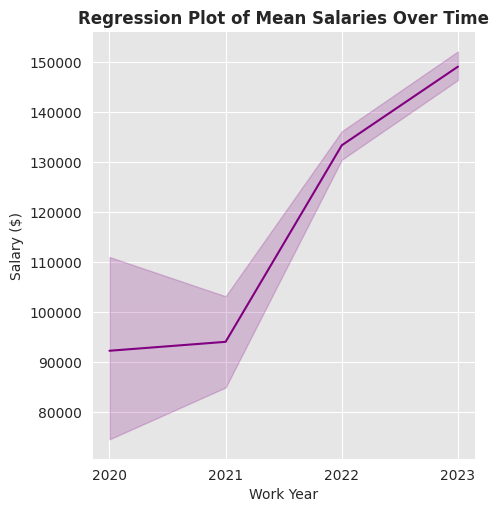

In [26]:
import matplotlib.ticker as ticker
sns.relplot(data=df, x="work_year", y="salary_in_usd", kind="line", color='purple')
plt.xlabel('Work Year')
plt.ylabel('Salary ($)')
plt.title('Regression Plot of Mean Salaries Over Time', fontweight = "bold")

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

Text(0.5, 1.0, 'Salary Distributions by Experience Level')

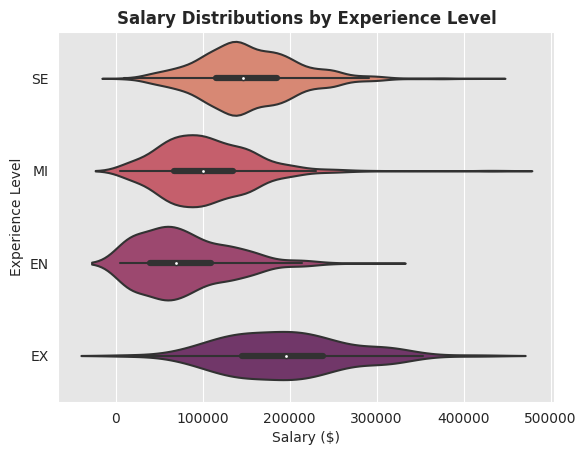

In [27]:
sns.violinplot(data=df, x="salary_in_usd", y="experience_level", palette = "flare")
plt.xlabel('Salary ($)')
plt.ylabel('Experience Level')
plt.title('Salary Distributions by Experience Level', fontweight = "bold")

Text(0.5, 1.0, 'Salaries vs. Ratio of Remote Work')

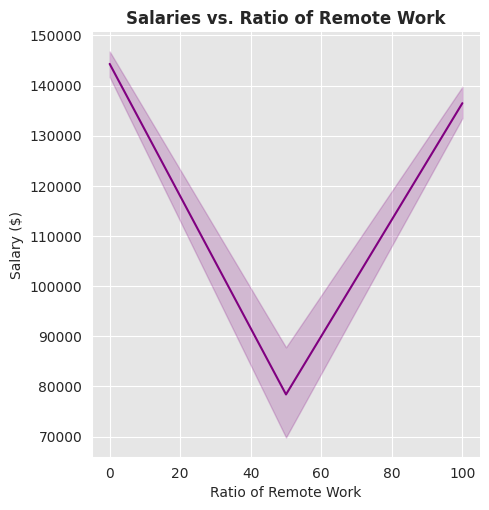

In [28]:
sns.relplot(data=df, x="remote_ratio", y="salary_in_usd", kind="line", color = "purple")
plt.xlabel('Ratio of Remote Work')
plt.ylabel('Salary ($)')
plt.title('Salaries vs. Ratio of Remote Work', fontweight = "bold")

In [29]:
!pip install geopandas
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 31.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=eb2180435fc771d96045f673533b6f0cdf1ea9772caa143620ce315d5b4e195c
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


<ipython-input-30-9829b5af2995>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


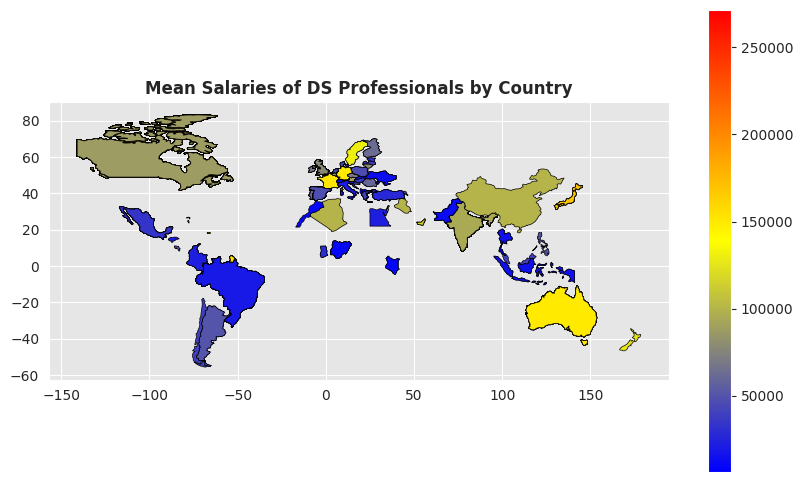

In [30]:
import plotly.express as px
import geopandas as gpd
import pycountry
import matplotlib.colors as mcolors

country_map = {}

for country in pycountry.countries:
    country_map[country.alpha_2] = country.name

cmap = mcolors.LinearSegmentedColormap.from_list('my_cmap', ['blue', 'yellow', 'red'])

df['company_location'] = df['company_location'].replace(country_map)
df['employee_residence'] = df['employee_residence'].replace(country_map)

fig, ax = plt.subplots(figsize=(10,6))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(df, left_on = 'name', right_on ='company_location')
mean_salaries = merged.groupby('company_location')['salary_in_usd'].mean()

vmin = mean_salaries.min()
vmax = mean_salaries.max()

merged.plot(column='salary_in_usd', cmap=cmap, linewidth=0.5, ax=ax, edgecolor='black', legend=True, vmin=vmin, vmax=vmax)

plt.title('Mean Salaries of DS Professionals by Country', fontweight = "bold")
plt.show()

## ML Portion: 
### Predicting Factors for Higher Salaries - Linear Regression

In [44]:

df_copy = df

# dropping columns that won't be used in linear regression model
df_copy = df_copy.drop(['work_year','employee_residence','remote_ratio', 'salary_currency'], axis=1)
df_copy.shape

(3755, 7)

In [45]:
# Removing outliers
Q1 = df_copy['salary_in_usd'].quantile(0.25)
Q3 = df_copy['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
df_copy = df_copy[~((df_copy['salary_in_usd']< (Q1 - 1.5 * IQR)) | (df_copy['salary_in_usd'] > (Q3 + 1.5 * IQR)))]
df_copy.shape

(3692, 7)

In [46]:
categorical_vars = ['experience_level','job_title' ,'company_location','company_size','employment_type']
numeric_vars = ['salary_in_usd']

X = df_copy[categorical_vars]
#X = df_copy[categorical_vars].copy().reset_index(drop=True)

X.head()

y = df_copy[numeric_vars]
y.head()

,salary_in_usd
0,85847
1,30000
2,25500
3,175000
4,120000


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Transform any non-normal distributions of salary to a normal distribution

df_copy['salary_in_usd'] = np.log1p(df_copy['salary_in_usd'])

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_copy['salary_in_usd'] = scaler.fit_transform(df_copy[['salary_in_usd']]) #double [] used because this function needs a 2-d array and salary column by itself is a 1-d array

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_cols = df_copy.select_dtypes(include=['object']).columns
num_cols = df_copy.select_dtypes(include=['float64']).columns

categorical_transformer = Pipeline(steps=[("hotencoder", OneHotEncoder(handle_unknown="ignore"))])

In [51]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[ ("cat", categorical_transformer, cat_cols) ])
                                              

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [53]:
from sklearn.pipeline import Pipeline

lr_train = Pipeline(steps = [("preprocessor", preprocessor),
                                ("lr", lr)])

In [54]:
reg_model = lr_train.fit(X_train,y_train)

In [55]:
print("Intercept: ", reg_model.named_steps['lr'].intercept_)

Intercept:  [41249.32377699]


In [56]:
X_pred = reg_model.predict(X_test)

In [57]:
print("Predicted values: ", X_pred[0:5].round(2))

Predicted values:  [[133073.42]
 [177635.64]
 [131149.75]
 [129168.62]
 [155034.21]]


In [58]:
y_test.salary_in_usd[0:5]

310     198800
1925    145000
3092    148700
2089     65000
3184    165400
Name: salary_in_usd, dtype: int64

In [59]:
# calculate error
from sklearn.metrics import mean_absolute_error, r2_score

mea = mean_absolute_error(y_test,X_pred)
r2_score = r2_score(y_test, X_pred)

print("\n The mean absolute error is: ", mea, "\n The r-squared score is ", r2_score)


 The mean absolute error is:  32650.376443557805 
 The r-squared score is  0.47353054488788193
